Welcome! This is the code for Exercise 3 of Session 2 of the Fall 2024 Capita Selecta course.
Your task is to add code where we wrote: `# todo`.

In [1]:
import numpy as np
from scipy.special import softmax
import networkx as nx


outputs = ['arg0', 'arg1', 'O']

First we define a function so we can print all our matrices and vectors to latex.

In [2]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

We create the sentence and the vocabulary mappings. The vocabulary contains all unique words and maps to their ids (or the reverse).

In [3]:
# we define the sentence
sent = "the cat sees the tree with the binoculars".split()
# we create the vocabulary based on the sentence
vocab_w2i = {}
vocab_i2w = {}
for i, w in enumerate(sorted(list(set(sent)))):
  vocab_w2i[w] = i
  vocab_i2w[i] = w

# we transfer the sentence to a list of vocab ids
sent_wordids = [vocab_w2i[w] for w in sent]

### We create lists for outgoing and incoming connections of each word
sent_incoming_nodes = []
sent_outgoing_nodes = []
for _ in sent:
  sent_incoming_nodes.append([])
  sent_outgoing_nodes.append([])
## we start by adding the neighbours in the sentence
for i in range(len(sent)):
  # if not the first word
  if i != 0:
    # add connection with previous word (bidirectional sequence connections)
    sent_incoming_nodes[i].append(i-1)
    sent_outgoing_nodes[i].append(i-1)
  # if not the last word
  if i != len(sent)-1:
    # add connection with next word (bidirectional sequence connections)
    sent_incoming_nodes[i].append(i+1)
    sent_outgoing_nodes[i].append(i+1)

## now we manually have to add the entire tree as connections
# 'the' depends on 'cat'          sent[0], sent[1]
sent_incoming_nodes[0].append(1)
sent_outgoing_nodes[1].append(0)

# todo

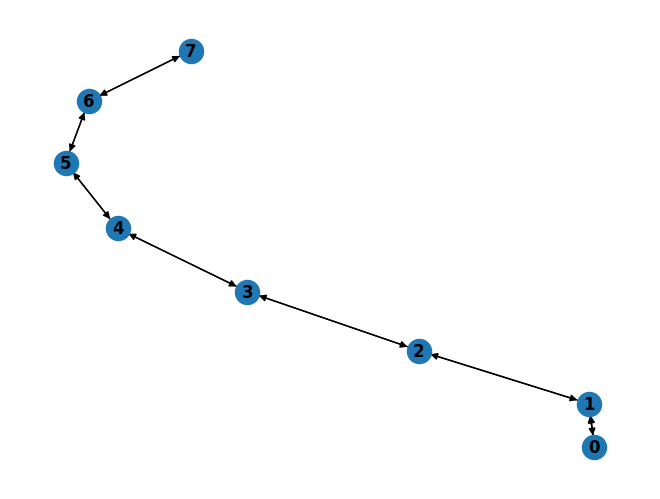

In [4]:
graph = nx.MultiDiGraph()
graph.add_nodes_from([(i, {'word': w}) for i, w in enumerate(sent)])
for i, l in enumerate(sent_incoming_nodes):
    for j in l:
        graph.add_edge(i,j)
nx.draw(graph, with_labels=True, font_weight='bold')

let's see what we have:

In [5]:
print("vocab:\t", vocab_i2w)
print(sent)
print(sent_wordids)
print(sent_incoming_nodes)
print(sent_outgoing_nodes)

vocab:	 {0: 'binoculars', 1: 'cat', 2: 'sees', 3: 'the', 4: 'tree', 5: 'with'}
['the', 'cat', 'sees', 'the', 'tree', 'with', 'the', 'binoculars']
[3, 1, 2, 3, 4, 5, 3, 0]
[[1, 1], [0, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6]]
[[1], [0, 2, 0], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6]]


first we create our word embeddings

In [6]:
embeddings = np.array([
  [-0.5, 0.7],  # binoculars
  [1.4, 1.1],   # cat
  [0.8, -0.5],    # sees
  [-0.3, 0.1],   # the
  [1.3, 0.8],  # tree
  [0.8, -0.8]   # with
])
print(embeddings)
print(bmatrix(embeddings))

[[-0.5  0.7]
 [ 1.4  1.1]
 [ 0.8 -0.5]
 [-0.3  0.1]
 [ 1.3  0.8]
 [ 0.8 -0.8]]
\begin{bmatrix}
  -0.5 & 0.7\\
  1.4 & 1.1\\
  0.8 & -0.5\\
  -0.3 & 0.1\\
  1.3 & 0.8\\
  0.8 & -0.8\\
\end{bmatrix}


and now we create all the weight and biases

In [7]:
w_in = np.array([
  [-0.5, 0., 0.6],
  [-2, 0.5, 1.0],
  [2.0, -0.7, -0.8]
])
w_out = np.array([
  [0.1, -1., 1.],
  [-0.7, -2., 2.],
  [1., 0.3, -0.8]
])
w_pred = np.array([
  [3., -2., 0.2],
  [0.1, 2., -3.],
  [0.7, -2., 2.]
])
b_in = np.array([.6, 3., -1.])
b_out = np.array([-0.7, 1., 0.2])
b_pred = np.array([1,-0.5,-0.5])

print("w_in:\n", w_in)
print("w_out:\n", w_out)
print("w_pred:\n", w_pred)
print("b_in:\n", b_in)
print("b_out:\n", b_out)
print("b_pred:\n", b_pred)

w_in:
 [[-0.5  0.   0.6]
 [-2.   0.5  1. ]
 [ 2.  -0.7 -0.8]]
w_out:
 [[ 0.1 -1.   1. ]
 [-0.7 -2.   2. ]
 [ 1.   0.3 -0.8]]
w_pred:
 [[ 3.  -2.   0.2]
 [ 0.1  2.  -3. ]
 [ 0.7 -2.   2. ]]
b_in:
 [ 0.6  3.  -1. ]
b_out:
 [-0.7  1.   0.2]
b_pred:
 [ 1.  -0.5 -0.5]


Now let us create our initial hidden states for all the nodes

In [8]:
# lets start by taking all the correct embeddings from the matrix
h_0 = np.zeros((len(sent), embeddings.shape[1]))

# todo

# now we concatenate a one hot vector, with a 1 where the predicate is
one_hot = np.zeros((len(sent),1))

# todo

h_0 = np.concatenate([h_0, one_hot], axis=1)
h_0

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

now we implement the GCN update algorithm

In [9]:
h_1 = np.zeros_like(h_0)

for i,w in enumerate(sent):
  print(f"\n\nupdate h({i}) of word \"{w}\":\n------------")
  
  # todo
  
  print("v_in:\n", (v_in))
  print("v_out:\n", (v_out))
  print("h_1[i]:\n", (tmp))
  print("RELU h_1[i]:\n", (h_1[i]))



update h(0) of word "the":
------------


NameError: name 'v_in' is not defined

So we have the following h at timestep 1:

In [10]:
print(h_1)
print(bmatrix(h_1))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
\begin{bmatrix}
  0. & 0. & 0.\\
  0. & 0. & 0.\\
  0. & 0. & 0.\\
  0. & 0. & 0.\\
  0. & 0. & 0.\\
  0. & 0. & 0.\\
  0. & 0. & 0.\\
  0. & 0. & 0.\\
\end{bmatrix}


now we make our prediction

In [11]:
# todo
pred = ...
pred_softmax = ...

print("pred\n", bmatrix(pred))
print("pred_dist\n", bmatrix(pred_softmax))

AttributeError: 'ellipsis' object has no attribute 'shape'

In [ ]:
print("Predicted role labels for predicate 'see'")
for i, w in enumerate(sent):
  # todo
  # print the predicted label index and the label itself
  print("{:10} {} - {}".format(w, ..., ...))

Predicted role labels for predicate 'see'
the        2 - O
cat        0 - arg0
sees       2 - O
the        1 - arg1
tree       0 - arg0
with       1 - arg1
the        1 - arg1
binoculars 1 - arg1
